<a href="https://colab.research.google.com/github/dtype2100/TIL/blob/master/soy_wordrank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install soynlp

     |████████████████████████████████| 416 kB 9.0 MB/s 


In [ ]:
pip install krwordrank

In [ ]:
pip install wordcloud

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,271 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155455 files and d

In [ ]:
import pandas as pd

In [ ]:
df.head(1)

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,2.100201e+06,20220317,머니투데이,정인지|기자,"CJ올리브영, 연남동에 클린뷰티 팝업스토어 열어",경제>서비스_쇼핑,경제>유통,경제>부동산,NaN,NaN,NaN,NaN,"마포구,연남동,서울시","CJ올리브영,올리브영,BEAUTY-CYCLE,올리브영 클린뷰티,연남동,클린뷰티","CJ올리브영,연남동,열어,클린뷰티,팝업,스토어,CJ올리브영,올리브영,18일,열흘간,...","올리브영,클린뷰티,팝업스토어,화장품,연남동,구달,뷰티사이클,라운드어라운드,아누,론칭...",[머니투데이 정인지 기자] \n \n\n CJ올리브영(이하 올리브영)은 오는 18일...,http://news.moneytoday.co.kr/view/mtview.php?n...,NaN


20220307 - 20220317

In [ ]:
title = df['제목']

In [ ]:
from krwordrank.word import KRWordRank

min_count = 5   # 단어의 최소 출현 빈도수 (그래프 생성 시)
max_length = 10 # 단어의 최대 길이
wordrank_extractor = KRWordRank(min_count=min_count, max_length=max_length)

In [ ]:
beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10
texts = title
keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

In [ ]:
for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
        print('%8s:\t%.4f' % (word, r))

      지원:	47.5170
      출시:	40.7052
      주가:	29.1836
      투자:	26.6844
     러시아:	22.8274
      기업:	20.9949
      10:	20.8366
      모집:	20.7635
      최대:	19.4843
     지난해:	19.3678
      서울:	18.5490
      돌파:	17.6096
      20:	17.4371
      규모:	17.4271
      올해:	16.4392
      결정:	16.3320
      삼성:	15.8126
      확대:	15.6694
      만에:	15.6671
      상승:	15.6382
      국내:	15.4242
      선정:	14.9915
      시장:	14.9257
      사업:	14.8061
      개최:	14.3500
      추진:	14.2057
     우크라:	14.0517
      수출:	13.7734
      한국:	13.5973
     코로나:	13.4776


In [ ]:
stopwords = {'실시', '지원', '출시', '주가', '투자', '10', '모집', '최대', '지난해', '서울', '돌파', '20', '규모', '올해', '결정', '확대', '만에', '상승', '국내', '선정', '시장', '사업', '개최', '추진', '기업', '삼성', '우크라', '한국', '러시아', '코로나', '가격'}
passwords = {word:score for word, score in sorted(
    keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}

In [ ]:
from krwordrank.word import summarize_with_keywords

keywords = summarize_with_keywords(texts, min_count=5, max_length=10,
    beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)
keywords = summarize_with_keywords(texts) # with default arguments

scan vocabs ... 
num vocabs = 20585
done


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# Set your font path
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

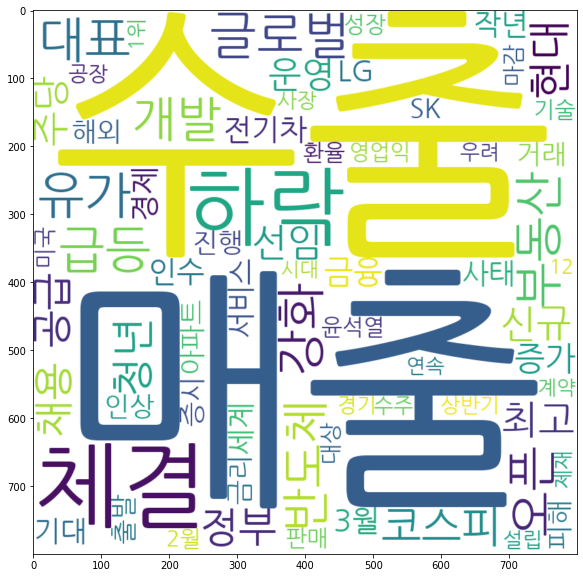

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

In [ ]:
from krwordrank.sentence import summarize_with_sentences

texts = title
keywords, sents = summarize_with_sentences(texts, num_keywords=100, num_keysents=10)

In [ ]:
penalty = lambda x:0 if (25 <= len(x) <= 80) else 1
stopwords = {'실시', '지원', '출시', '주가', '투자', '10', '모집', '최대', '지난해', '서울', '돌파', '20', '규모', '올해', '결정', '확대', '만에', '상승', '국내', '선정', '시장', '사업', '개최', '추진', '기업', '삼성', '우크라', '한국', '러시아', '코로나', '가격'}

keywords, sents = summarize_with_sentences(
    texts,
    penalty=penalty,
    stopwords = stopwords,
    diversity=0.5,
    num_keywords=100,
    num_keysents=10,
    verbose=False
)

In [ ]:
penalty=lambda x:0 if (25 <= len(x) <= 80 and not '마지막' in x) else 1,
keywords, sents = summarize_with_sentences(
    texts,
    penalty=penalty,
    stopwords = stopwords,
    diversity=0.5,
    num_keywords=100,
    num_keysents=10,
    verbose=False
)

print(sents)

['[굿모닝증시] "우크라 사태로 글로벌 경기 위축 우려 코스피 하락 출발 예상"', '“LTV 완화 땐 다시 집값 자극 금리 인상 부동산 안정화 대책을” [윤석열 정부 금융정책]', "'유가하락 새정부' 날개 단 코스피 2% '쑥' 4거래일 만 반등 성공 [마감시황]", '윤석열 정부 경제사령탑은 누가? 尹 정부 기대감에 코스피 급등 [한강로 경제브리핑]', "尹'부동산 공급 확대 규제 완화'기조, 울산 중구, 조정대상지역 해제 기대감", '"유가 100달러 아래로" 금리인상 \'D-1\' 美증시 급등 [뉴욕마감]', '지난달 ICT 수출액 역대 2월 최고치 11개월 연속 두 자릿수 증가', '우크라 사태 경제 피해 가시화・・・경기도, 수출애로 해소 위한 기업 목소리 청취', '현대캐피탈, 작년 글로벌 법인 자산총액 74조 "역대 최고 실적"', '中정부, 반도체 전폭 지원 작년 산업 매출 18% 증가']


In [ ]:
sents

['[굿모닝증시] "우크라 사태로 글로벌 경기 위축 우려 코스피 하락 출발 예상"',
 '“LTV 완화 땐 다시 집값 자극 금리 인상 부동산 안정화 대책을” [윤석열 정부 금융정책]',
 "'유가하락 새정부' 날개 단 코스피 2% '쑥' 4거래일 만 반등 성공 [마감시황]",
 '윤석열 정부 경제사령탑은 누가? 尹 정부 기대감에 코스피 급등 [한강로 경제브리핑]',
 "尹'부동산 공급 확대 규제 완화'기조, 울산 중구, 조정대상지역 해제 기대감",
 '"유가 100달러 아래로" 금리인상 \'D-1\' 美증시 급등 [뉴욕마감]',
 '지난달 ICT 수출액 역대 2월 최고치 11개월 연속 두 자릿수 증가',
 '우크라 사태 경제 피해 가시화・・・경기도, 수출애로 해소 위한 기업 목소리 청취',
 '현대캐피탈, 작년 글로벌 법인 자산총액 74조 "역대 최고 실적"',
 '中정부, 반도체 전폭 지원 작년 산업 매출 18% 증가']